In [3]:
import numpy as np
import pandas as pd
from clusterian import misc, enrich, metrics
from importlib import reload
import os
import pickle

In [4]:
def createGCT(data, name='rna', GSEA_dir = '../GSEA_files'):
    pref = pd.DataFrame([data.index, ['na']*data.shape[0]], index=['NAME', 'Description'], 
                    columns=data.index).T
    gct_df = pd.concat([pref, data], axis=1)
    file_header = '#1.2\n'+str(gct_df.shape[0])+'\t'+str(gct_df.shape[1]-2)+'\n'
    
    file_path = os.path.join(GSEA_dir, name+'.gct')
    f = open(file_path, 'w')
    f.write(file_header)
    f.close()
    gct_df.to_csv(file_path, mode='a', sep='\t', header=True, index=False)
    return file_path

In [5]:
def createCLS(cat, name='cat', GSEA_dir = '../GSEA_files'):
    classes = np.unique(cat)
    l1 = ' '.join([str(len(cat)), str(len(classes)), '1'])
    l2 = ' '.join(['#', 
                   repr(np.unique(cat).tolist()).replace("'", '').replace(",", '')[1:-1]])
    cat_bin = [0]*len(cat)
    for i in range(len(cat)):
        if cat[i]==classes[-1]:
            cat_bin[i] = 1
    l3bin = repr(cat_bin).replace("'", '').replace(",", '')[1:-1]
    cls_content = '\n'.join([l1, l2, l3bin])
    
    file_path = os.path.join(GSEA_dir, name+'.cls')
    f = open(file_path, 'w')
    f.write(cls_content)
    f.close()
    return file_path

In [ ]:
def createGMX(sol, mm, GSEA_dir = '../GSEA_files'):
    file_path = os.path.join(GSEA_dir, sol+'.gmx')
    gmx_content_T = []
    for i,c in enumerate(mm.columns):
        name = sol+'_'+str(c)
        g_ = mm.index[mm.loc[:,c]==1].values.tolist()
        row = [name, 'na']+g_
        gmx_content_T.append(pd.Series(row))
        
    pd.DataFrame(gmx_content_T).T.to_csv(file_path, sep='\t', header=False, index=False)
    return file_path

Create files and run GSEA analysis using all cluster created.

In [ ]:
GSEA_dir = '/home/ldap/ipellet/Documents/GSEA_files'
mm_dir = '/home/ldap/ipellet/Documents/Clustering/MembMatrix/'

In [7]:
mm_dir_content = []

for root,dirs,files in os.walk(mm_dir):
    mm_dir_content.extend(files)
    break

In [8]:
sol_ = []
for f in mm_dir_content:
    sol_.append(f.removesuffix('.csv'))

In [9]:
sol_

['ICA_rna_1e-2',
 'KMeans_g2v_200',
 'SOM_rna_square_letremy_letremy_standard',
 'WGCNA_g2v_ch0.10_recl0',
 'HC_rna_201',
 'KMeans_rna_200',
 'GM_g2v_200_full',
 'PAM_rna_200',
 'SOM_g2v_square_gaussian_canberra_standard',
 'PAM_g2v_200',
 'HC_g2v_200',
 'FLAME_g2v_6nn_1e-15',
 'FLAME_rna_4n_1e-15',
 'ICA_g2v_1e-6',
 'GM_rna_200_full',
 'WGCNA_rna_ch0.01_2rcl_rcl0']

In [17]:
gmx_f_ = []
for sol in sol_:
    mm = misc.load_mm(mm_dir+sol+'.csv')
    gmx_f_.append(createGMX(sol, mm))

In [18]:
gmx_f_

['../GSEA_files/ICA_rna_1e-2.gmx',
 '../GSEA_files/KMeans_g2v_200.gmx',
 '../GSEA_files/SOM_rna_square_letremy_letremy_standard.gmx',
 '../GSEA_files/WGCNA_g2v_ch0.10_recl0.gmx',
 '../GSEA_files/HC_rna_201.gmx',
 '../GSEA_files/KMeans_rna_200.gmx',
 '../GSEA_files/GM_g2v_200_full.gmx',
 '../GSEA_files/PAM_rna_200.gmx',
 '../GSEA_files/SOM_g2v_square_gaussian_canberra_standard.gmx',
 '../GSEA_files/PAM_g2v_200.gmx',
 '../GSEA_files/HC_g2v_200.gmx',
 '../GSEA_files/FLAME_g2v_6nn_1e-15.gmx',
 '../GSEA_files/FLAME_rna_4n_1e-15.gmx',
 '../GSEA_files/ICA_g2v_1e-6.gmx',
 '../GSEA_files/GM_rna_200_full.gmx',
 '../GSEA_files/WGCNA_rna_ch0.01_2rcl_rcl0.gmx']

In [19]:
gmx_s = " ".join(gmx_f_)

In [252]:
#gmx_f = createGMX(sol, sol_sh, mm)

In [10]:
rna = pd.read_csv('/home/ldap/ipellet/Documents/data/DataRnaseq_Transposed.csv', index_col=0)

In [11]:
outcome = pd.read_csv('/home/ldap/ipellet/Documents/data/DataOutcome', sep=' ')

In [12]:
rna.columns = outcome.index

In [13]:
cat = outcome['x'].values.tolist()

In [14]:
gct_f = createGCT(rna, name='rna')

In [15]:
cls_f = createCLS(cat, name='cat')

In [16]:
out_dir = os.path.join(GSEA_dir, "aug16")

In [20]:
gmx_df_ = []
for i in range(len(gmx_f_)):
    gmx_df_.append(pd.read_csv(gmx_f_[i], sep='\t'))

In [22]:
for df in gmx_df_:
    print(df.columns[0])

ICA_rna_1e-2_0
KMeans_g2v_200_0
SOM_rna_square_letremy_letremy_standard_0
WGCNA_g2v_ch0.10_recl0_0
HC_rna_201_0
KMeans_rna_200_0
GM_g2v_200_full_0
PAM_rna_200_0
SOM_g2v_square_gaussian_canberra_standard_0
PAM_g2v_200_0
HC_g2v_200_0
FLAME_g2v_6nn_1e-15_0
FLAME_rna_4n_1e-15_0
ICA_g2v_1e-6_0
GM_rna_200_full_0
WGCNA_rna_ch0.01_2rcl_rcl0_0


In [23]:
gmx_df_concat = pd.concat(gmx_df_, axis=1)

In [24]:
gmx_all = os.path.join(GSEA_dir, "all.gmx")

In [25]:
gmx_df_concat.to_csv(gmx_all, sep='\t', header=True, index=False)

In [26]:
len(np.unique(gmx_df_concat.columns))==gmx_df_concat.shape[1]

True

In [27]:
%%bash -s "$gct_f" "$cls_f" "$gmx_all" "$out_dir"
bash ../GSEA_Linux_4.2.3/gsea-cli.sh GSEA -res $1 -cls $2 -gmx $3 -collapse false -out $4

echo Using bundled JDK.


[1661417333788] [INFOS] Parameters passed to GSEA tool:
[1661417333892] [INFOS] gmx	../GSEA_files/all.gmx
[1661417333893] [INFOS] res	../GSEA_files/rna.gct
[1661417333893] [INFOS] cls	../GSEA_files/cat.cls
[1661417333893] [INFOS] rnd_seed	timestamp
[1661417333894] [INFOS] rpt_label	my_analysis
[1661417333894] [INFOS] collapse	false
[1661417333895] [INFOS] zip_report	false
[1661417333895] [INFOS] gui	false
[1661417333895] [INFOS] out	../GSEA_files/aug16
[1661417334065] [INFOS] Begun importing: Dataset from: rna.gct
# of elements = 1
../GSEA_files/cat.cls 
[1661417337628] [INFO] No dataset collapsing was done .. using original as is
to parse>../GSEA_files/all.gmx< got: [../GSEA_files/all.gmx]
[1661417337630] [INFO] Begun importing: GeneSetMatrix from: all.gmx
[1661417339329] [INFO] Already a synched dataset-template -- NO extracting done
[1661417339336] [INFO] Timestamp used as random seed: 1661417337514
[1661417340428] [INFO] Got gsets: 3461 now preprocessing them ... min: 15 max: 500
D

# Results

In [28]:
import os
import pandas as pd
import re
from clusterian import enrich
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
def getGO(enr, string=False):
    GO = []
    for t in enr.loc[:,'Term']:
        GO.append(t.split(' ')[-1][1:-1])
    if not string:
        return GO
    return ','.join(GO)

In [30]:
def getOntology(enr):
    go = getGO(enr, string=True)
    urlBase = "https://www.ebi.ac.uk/QuickGO/services/ontology/go/terms/{ids}/chart?ids="

    GO_str = go.replace(':','%3A').replace(',','%2C')
    requestURL = urlBase+GO_str
    return requestURL

In [57]:
GSEA_dir = os.path.join(GSEA_dir, 'aug16/my_analysis.Gsea.1661417337514/')
status = ['NR','R']
report_f = {'NR':os.path.join(GSEA_dir, 'gsea_report_for_NR_1661417337514.tsv'),
            'R':os.path.join(GSEA_dir, 'gsea_report_for_R_1661417337514.tsv')}
report = {s:pd.read_csv(report_f[s], sep='\t').iloc[:,:-1] for s in status}

In [58]:
sol_dir = mm_dir
for root, dirs, files in os.walk(sol_dir):
    sol_ = [f.removesuffix('.csv') for f in files]
    sol_path = [os.path.join(sol_dir,r) for r in files]
    break
sol_short = []
for r in sol_[2:]:
    sol_short.append('_'.join(r.split('_')[:2]))

In [59]:
for s in status:
    df = report[s]
    new_ = []
    for i in range(df.shape[0]):
        row = df.iloc[i,:]
        name_cap = '_'.join(row['NAME'].split('_')[:2])
        cl = int(row['NAME'].split('_')[-1])
        for sol in sol_short:
            matchObj = re.search(name_cap, sol, flags=re.IGNORECASE)
            if matchObj:
                break
        alg = sol.split('_')[0]
        dataset = sol.split('_')[1]
        new_serie = pd.Series([sol,cl,alg,dataset,row['NAME']], 
                              index=['SOL','CL','ALG','DS','NAME'])
        new_.append(pd.concat([new_serie,row.iloc[-8:]]))
    report[s] = pd.concat(new_, axis=1).T

In [61]:
FDRth = 0.25
FDR_filter = {s:report[s].loc[:,'FDR q-val']<FDRth for s in status}
report_FDRfilt = {s:report[s].loc[FDR_filter[s],:].sort_values('FDR q-val') for s in status}

## Overlapp

Check if enriched clusers are overlapping : Jaccard index

In [325]:
from clusterian import misc

In [326]:
for root, dirs, mm_files in os.walk(mm_dir):
    break
    
mm_files

['ICA_rna_1e-2.csv',
 'KMeans_g2v_200.csv',
 'SOM_rna_square_letremy_letremy_standard.csv',
 'WGCNA_g2v_ch0.10_recl0.csv',
 'HC_rna_201.csv',
 'KMeans_rna_200.csv',
 'GM_g2v_200_full.csv',
 'PAM_rna_200.csv',
 'SOM_g2v_square_gaussian_canberra_standard.csv',
 'PAM_g2v_200.csv',
 'HC_g2v_200.csv',
 'FLAME_g2v_6nn_1e-15.csv',
 'FLAME_rna_4n_1e-15.csv',
 'ICA_g2v_1e-6.csv',
 'GM_rna_200_full.csv',
 'WGCNA_rna_ch0.01_2rcl_rcl0.csv']

In [78]:
mm_dict = {}
for f in mm_files:
    sol = '_'.join(f.split('_')[:2])
    mm = misc.load_mm(os.path.join('MembMatrix',f))
    mm_dict[sol] = mm

In [96]:
J = {}
for s in status:
    df = report_FDRfilt[s]
    Js = pd.DataFrame(1, index=df.index, columns=df.index)
    for i,i0 in enumerate(df.index[0:-1]):
        #print('in i',i)
        mm0 = mm_dict[df.at[i0,'SOL']]
        cl0 = df.at[i0,'CL']
        
        try:
            g0 = mm0.index[mm0[cl0]==1].values.tolist()
        except KeyError:
            g0 = []
        del mm0
        for j,i1 in enumerate(df.index[i+1:]):
            #print('in j',j)
            mm1 = mm_dict[df.at[i1,'SOL']]
            cl1 = df.at[i1,'CL']
            try:
                g1 = mm1.index[mm1[cl1]==1].values.tolist()
            except KeyError:
                g1 = []
            del mm1

            #print('compute J')
            union = np.unique(g0+g1)
            if len(union)==0:
                J01=0
            else:
                J01 = (len(g0+g1)-len(union))/len(union)
            #print(J01)
            Js.at[i0,i1] = J01
            Js.at[i1,i0] = J01

    names = [df.at[ind,'SOL']+'_'+str(df.at[ind,'CL']) for ind in df.index]
    Js.columns = names
    Js.index = names
    J[s] = Js

In [266]:
a = np.array(J['NR'])
iu1 = np.triu_indices(a.shape[0],k=1)

In [290]:
jNR = np.array(J['NR'])[iu1]
jR = np.array(J['R'])[iu1]

In [298]:
Jlin_NR = pd.DataFrame([['NR']*len(jNR),jNR], index=['Status','J']).T
Jlin_R = pd.DataFrame([['R']*len(jR),jR], index=['Status','J']).T

In [304]:
Jlin = pd.concat([Jlin_NR,Jlin_R], ignore_index=True)

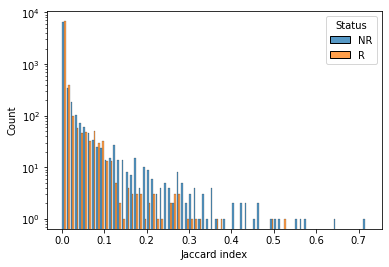

In [324]:
sns.histplot(data=Jlin, x='J', hue='Status', binwidth=0.01, multiple="dodge", shrink=.8)
plt.yscale('log')
plt.xlabel('Jaccard index');
#plt.savefig('../img/Jaccard_hist.png', bbox_inches='tight')